<a href="https://colab.research.google.com/github/adimail/classroom/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv('/content/burnout.csv')
df = pd.DataFrame(data)

data.head()

,Working Hours,Salary,Working ENV,Growth Opportunities,Satisfaction Rate,Burnout Rate
0,17,21,6,13,88,84.693
1,6,12,3,13,85,68.647
2,12,16,10,12,46,53.728
3,19,14,8,12,88,81.759
4,17,3,7,15,16,30.869


In [162]:
df['Satisfaction Rate'] = 100 - df['Satisfaction Rate']

In [163]:
df.head()

,Working Hours,Salary,Working ENV,Growth Opportunities,Satisfaction Rate,Burnout Rate
0,17,21,6,13,12,84.693
1,6,12,3,13,15,68.647
2,12,16,10,12,54,53.728
3,19,14,8,12,12,81.759
4,17,3,7,15,84,30.869


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working Hours         1000 non-null   int64  
 1   Salary                1000 non-null   int64  
 2   Working ENV           1000 non-null   int64  
 3   Growth Opportunities  1000 non-null   int64  
 4   Satisfaction Rate     1000 non-null   int64  
 5   Burnout Rate          1000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [165]:
df.columns

Index(['Working Hours', 'Salary', 'Working ENV', 'Growth Opportunities',
       'Satisfaction Rate', 'Burnout Rate'],
      dtype='object')

In [166]:
df.describe()

,Working Hours,Salary,Working ENV,Growth Opportunities,Satisfaction Rate,Burnout Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,12.851000,12.844000,5.587000,14.005000,49.069000,54.587194
std,6.954219,7.225501,2.848604,1.401049,29.638196,18.857064
min,1.000000,1.000000,1.000000,12.000000,0.000000,15.664000
25%,7.000000,7.000000,3.000000,13.000000,22.000000,39.126750
50%,13.000000,12.000000,6.000000,14.000000,48.000000,54.437500
75%,19.000000,19.000000,8.000000,15.000000,75.000000,70.004250
max,24.000000,25.000000,10.000000,16.000000,99.000000,97.466000


In [167]:
df.isna().sum()

Working Hours           0
Salary                  0
Working ENV             0
Growth Opportunities    0
Satisfaction Rate       0
Burnout Rate            0
dtype: int64

In [168]:
correlation_matrix = df.corr()
burnout_correlations = correlation_matrix['Burnout Rate']

In [169]:
correlation_matrix

,Working Hours,Salary,Working ENV,Growth Opportunities,Satisfaction Rate,Burnout Rate
Working Hours,1.000000,-0.079192,-0.000179,0.008501,-0.026856,0.256265
Salary,-0.079192,1.000000,-0.043159,-0.005955,0.037557,0.191232
Working ENV,-0.000179,-0.043159,1.000000,0.009798,0.015265,0.022230
Growth Opportunities,0.008501,-0.005955,0.009798,1.000000,-0.004830,0.033377
Satisfaction Rate,-0.026856,0.037557,0.015265,-0.004830,1.000000,-0.939837
Burnout Rate,0.256265,0.191232,0.022230,0.033377,-0.939837,1.000000


In [170]:
burnout_correlations

Working Hours           0.256265
Salary                  0.191232
Working ENV             0.022230
Growth Opportunities    0.033377
Satisfaction Rate      -0.939837
Burnout Rate            1.000000
Name: Burnout Rate, dtype: float64

In [171]:
most_correlated_feature = burnout_correlations.drop('Burnout Rate').abs().idxmax()
most_correlated_feature

'Satisfaction Rate'

Text(0.5, 1.0, 'Correlation Heatmap')

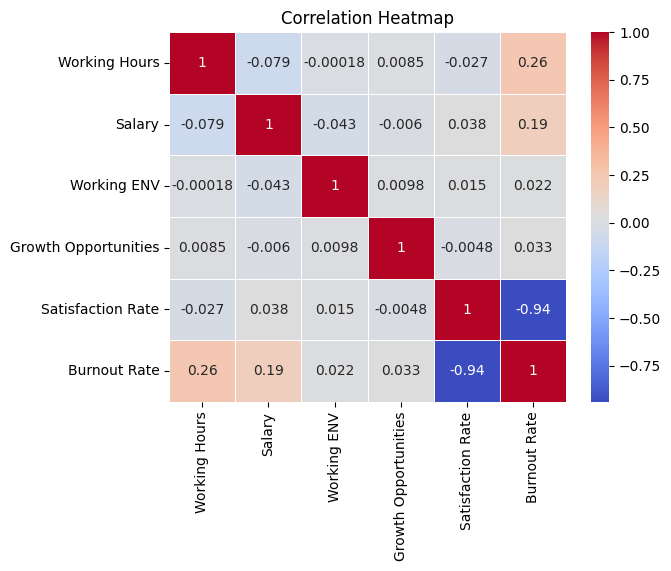

In [172]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

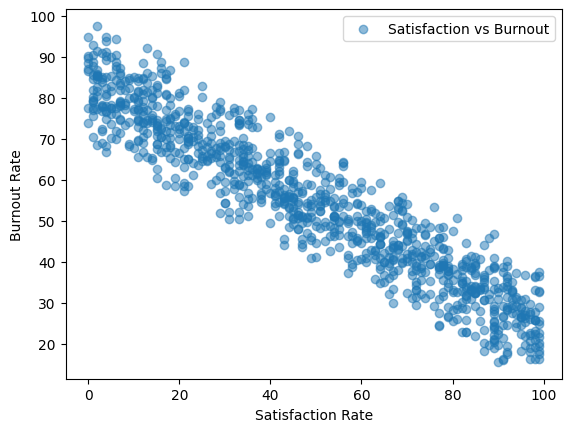

In [173]:
plt.scatter(df['Satisfaction Rate'],df['Burnout Rate'], label='Satisfaction vs Burnout', alpha=0.5)
plt.xlabel('Satisfaction Rate')
plt.ylabel('Burnout Rate')
plt.legend()
plt.show()

In [174]:
model = DecisionTreeRegressor(random_state=1)

In [175]:
df['Satisfaction Rate'] = pd.to_numeric(df['Satisfaction Rate'], errors='coerce')

In [176]:
x=df[['Satisfaction Rate','Working Hours']]
y=df['Burnout Rate']
# model.fit(x,y)

In [177]:
x

,Satisfaction Rate,Working Hours
0,12,17
1,15,6
2,54,12
3,12,19
4,84,17
...,...,...
995,41,24
996,33,22
997,84,8
998,83,5


In [178]:
y

0      84.693
1      68.647
2      53.728
3      81.759
4      30.869
        ...  
995    61.124
996    64.767
997    38.724
998    33.070
999    74.885
Name: Burnout Rate, Length: 1000, dtype: float64

In [179]:
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)

In [180]:
model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [181]:
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 5


In [182]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

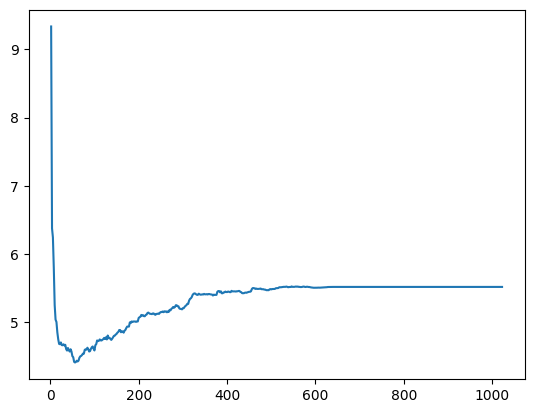

In [183]:
leaves = [x for x in range(2,1024,2)]
maerrors = []

for i in leaves:
    maerrors.append(get_mae(i,train_X, val_X, train_y, val_y))

plt.plot(leaves,maerrors)
plt.show()

In [184]:
maerrors.sort()
maerrors[0]

4.409346370248339

In [185]:
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in leaves}
best_tree_size = min(scores, key=scores.get)

In [186]:
best_tree_size

56

In [187]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model
final_model.fit(x, y)

DecisionTreeRegressor(max_leaf_nodes=56, random_state=1)

In [188]:
val_predictions = final_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 4


In [189]:
print(model.predict([[85,6]]))
print(final_model.predict([[85,6]]))

[33.284]
[28.32413043]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [190]:
print(model.predict([[0,0]]))
print(final_model.predict([[0,0]]))

[68.478]
[72.01066667]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
